In [2]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

figsize(14, 7)

/Users/Dupi/venv_py_3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
# Read file
train = pd.read_csv('train.csv')
train.drop('ID', axis=1, inplace=True)
test = pd.read_csv('test.csv')
Y = train.y
test_ID = test.ID

In [4]:
# Remove constant columns
constcols_train = list(train.loc[:, train.apply(lambda i: len(i.unique()) == 1)].columns)
goodcols = np.sort(list(set(train.columns).intersection(set(test.columns)) - set(constcols_train)))

train = pd.concat((train.y, train[goodcols[np.argsort([int(a.split('X')[1]) for a in goodcols])]]), axis=1)
test = test[goodcols[np.argsort([int(a.split('X')[1]) for a in goodcols])]]

In [5]:
# Label Encoder
for c in train.columns:
	if train[c].dtype == 'object':
		lbl = LabelEncoder()
		lbl.fit(list(train[c].values) + list(test[c].values))
		train[c] = lbl.transform(list(train[c].values))
		test[c] = lbl.transform(list(test[c].values))

In [6]:
# OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')
# X = enc.fit_transform(train.iloc[:, 1:]).todense().astype(int)
# X_final = enc.transform(test).astype(int).todense()

In [7]:
# Keep only categorical
X_categorical = train.drop('y', axis=1).iloc[:, 0:8]

In [8]:
# Correlation Heatmap
sns.set(context="paper", font="monospace")

# Compute categorical data correlation
df = X_categorical
corrmat = df.corr()

plt.figure('Corelogram', figsize=(17, 10))

# Draw the correlogramm using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Compute all data correlation heatmap
corrmat = train.drop('y', axis=1).corr()
plt.figure('Heatmap', figsize=(17, 17))
sns.heatmap(corrmat, vmax=.8, square=True, cmap=)
plt.axis('off')

SyntaxError: invalid syntax (<ipython-input-8-d9b60cabc2ca>, line 16)

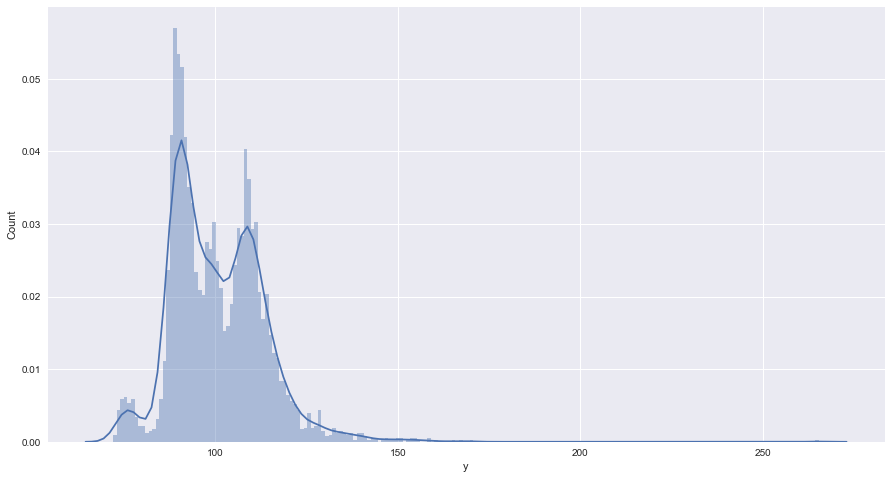

In [9]:
# Plot count versus time
plt.figure('Distribution', figsize(15, 8))
plt.ylabel('Count')
sns.distplot(train.y, bins=200)

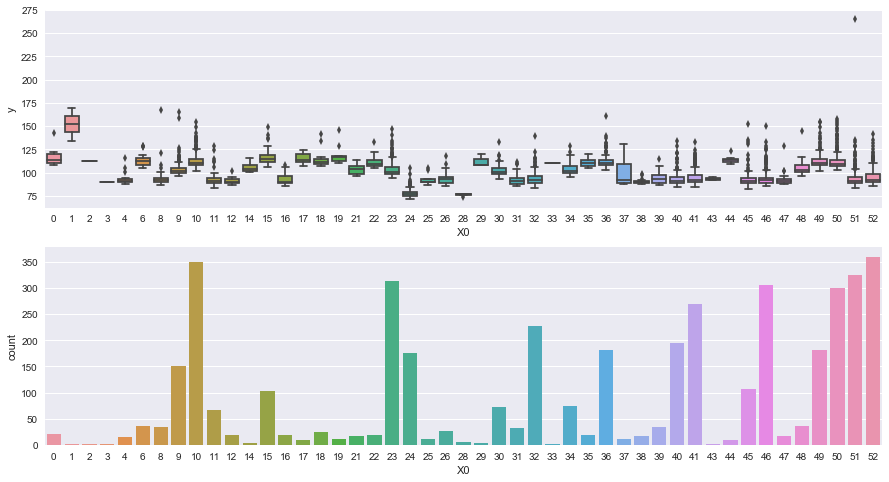

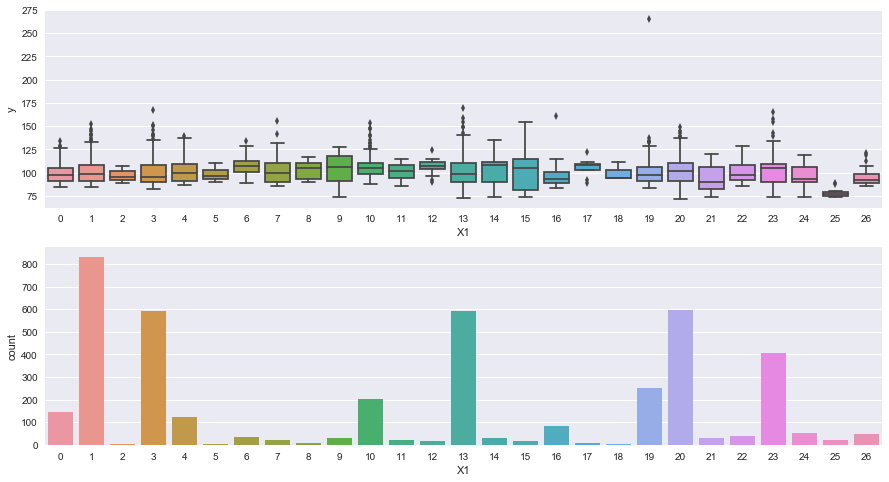

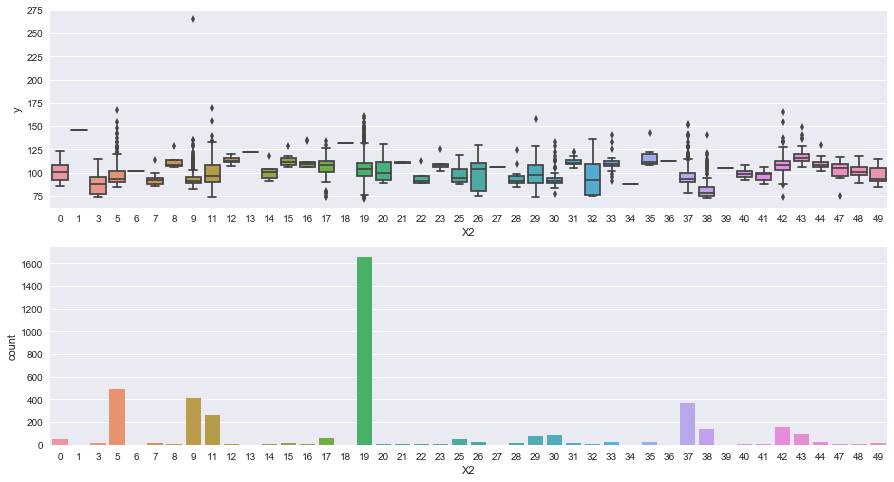

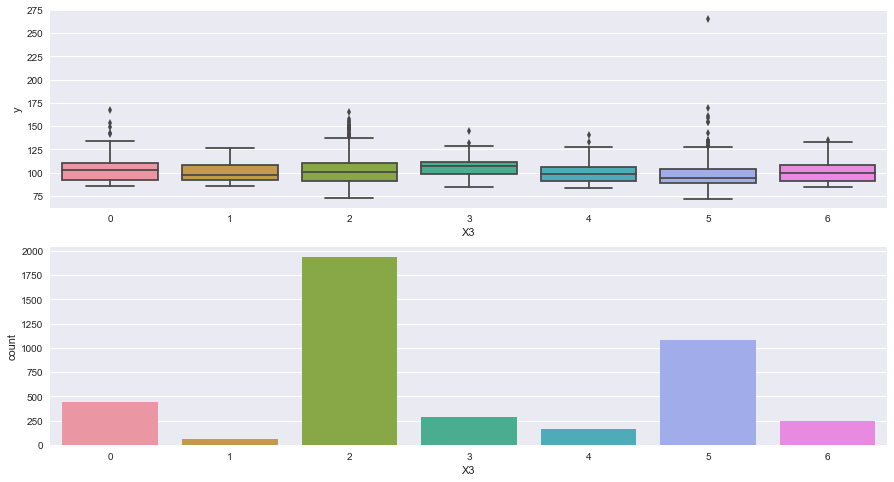

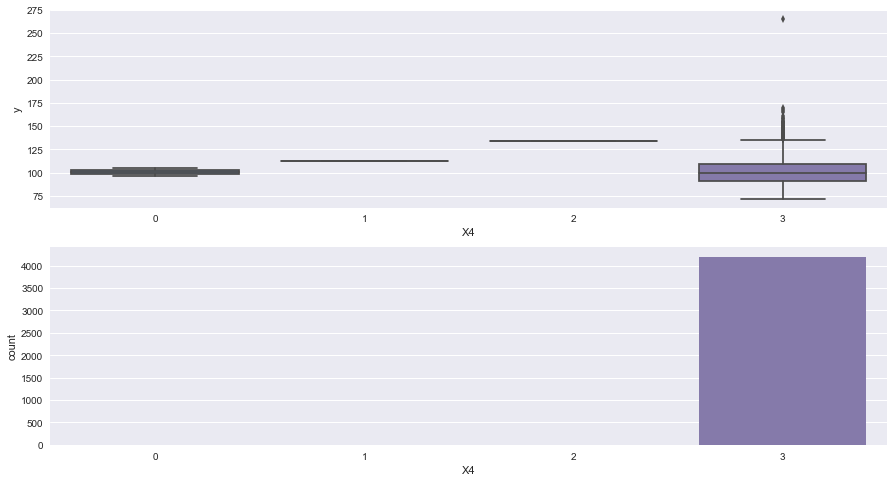

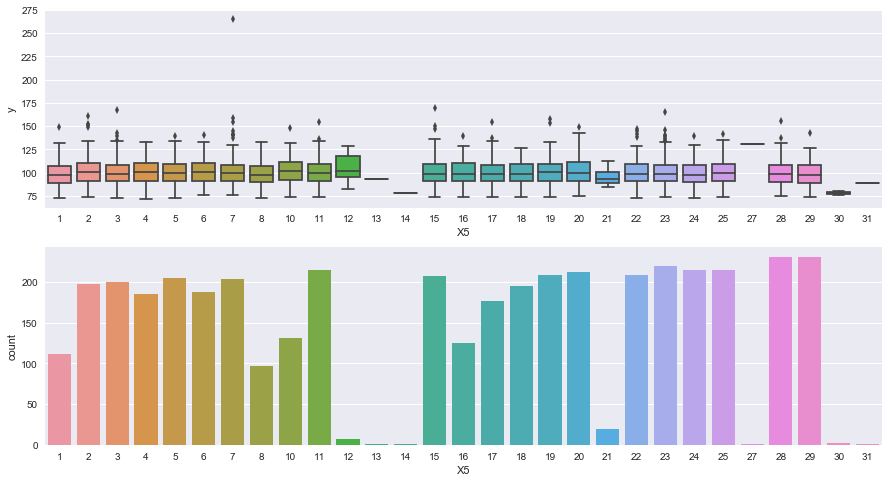

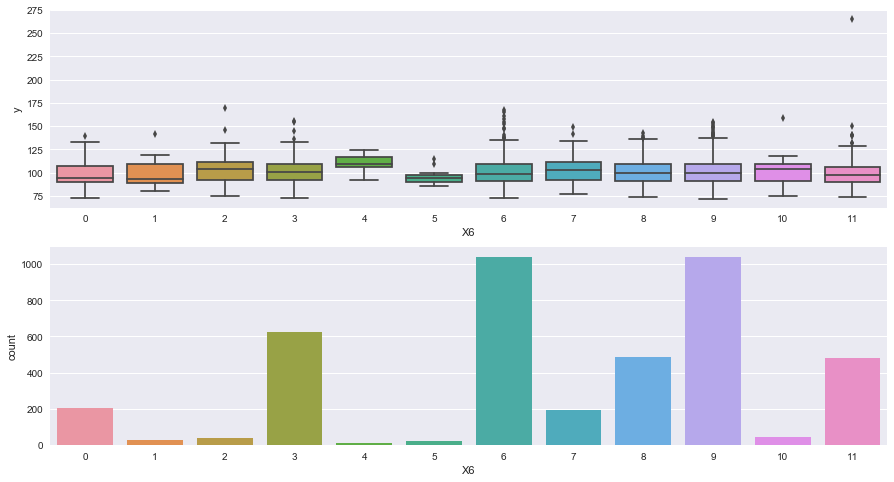

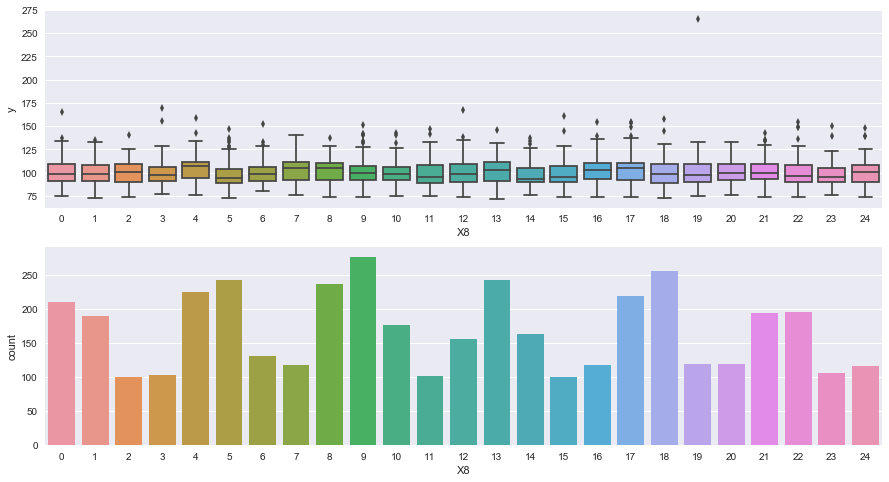

In [10]:
# Boxplot | Countplot categorical

i = 0
for k in X_categorical.keys():
	plt.figure(i, figsize=(15, 8))
	plt.subplot(211)
	sns.boxplot(x=k, y='y', data=train)
	plt.subplot(212)
	sns.countplot(x=k, data=train)
	i += 1

In [11]:
# MCA
import mca

X_mca = train[train.y<200]

mca_ben = mca.mca(X_mca)
mca_ind = mca.mca(X_mca, benzecri=False)

In [12]:
N_comp = 4

fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=X_mca.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, N+1)]))

table3.loc[fs,    :] = mca_ind.fs_r(N=N_comp).T
table3.loc[cos,   :] = mca_ind.cos_r(N=N_comp).T
table3.loc[cont,  :] = mca_ind.cont_r(N=N_comp).T * 1000

np.round(table3.astype(float), 2)

0     1     2     3     4     5     6     7     8     \
Factor score         1 -0.16 -0.07 -1.03 -1.02 -1.05  0.19 -0.13 -0.01 -0.04   
                     2 -0.30  0.02  0.38  0.51  0.60  0.04  0.02  0.06  0.01   
                     3 -0.01  0.07 -0.50 -0.52 -0.58 -0.21  0.15  0.23  0.18   
                     4  0.00 -0.01  0.06  0.13  0.13  0.04 -0.06 -0.03 -0.08   
Squared cosines      1  0.00  0.00  0.15  0.07  0.14  0.09  0.00  0.00  0.00   
                     2  0.00  0.00  0.02  0.02  0.05  0.00  0.00  0.01  0.00   
                     3  0.00  0.00  0.03  0.02  0.04  0.11  0.01  0.16  0.07   
                     4  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.02   
Contributions x 1000 1  0.10  0.02  3.91  3.51  3.48  0.12  0.06  0.00  0.01   
                     2  0.42  0.00  0.67  1.12  1.42  0.01  0.00  0.01  0.00   
                     3  0.00  0.02  1.27  1.28  1.46  0.20  0.11  0.22  0.17   
                     4  0.00  0.00  0.02  0.11  0.10  0.01  0.02  0.00  0.05   

                        9     ...   4199  4200  4201  4202  4203  4204  4205  \
Factor score         1  0.19  ...   0.14  0.13 -0.29 -0.52 -0.30 -0.18 -0.24   
                     2 -0.05  ...   0.10  0.04 -0.40 -1.19 -0.10 -0.09 -0.47   
                     3 -0.15  ...  -0.16 -0.09 -0.04 -0.29  0.34  0.24 -0.17   
                     4 -0.03  ...   0.09  0.04  0.16  0.19 -0.23 -0.16  0.20   
Squared cosines      1  0.05  ...   0.01  0.03  0.02  0.11  0.10  0.04  0.01   
                     2  0.00  ...   0.01  0.00  0.04  0.59  0.01  0.01  0.04   
                     3  0.03  ...   0.01  0.01  0.00  0.03  0.12  0.07  0.01   
                     4  0.00  ...   0.00  0.00  0.01  0.02  0.06  0.03  0.01   
Contributions x 1000 1  0.12  ...   0.06  0.06  0.30  0.91  0.25  0.10  0.19   
                     2  0.01  ...   0.04  0.01  0.73  6.10  0.03  0.03  0.92   
                     3  0.10  ...   0.11  0.04  0.01  0.40  0.44  0.23  0.13   
                     4  0.01  ...   0.04  0.01  0.16  0.23  0.26  0.14  0.23   

                        4206  4207  4208  
Factor score         1 -0.37 -0.14  0.16  
                     2 -0.17  0.05  0.11  
                     3  0.20  0.14  0.10  
                     4 -0.20  0.01  0.03  
Squared cosines      1  0.16  0.03  0.05  
                     2  0.03  0.00  0.03  
                     3  0.05  0.03  0.02  
                     4  0.05  0.00  0.00  
Contributions x 1000 1  0.43  0.06  0.09  
                     2  0.11  0.01  0.05  
                     3  0.18  0.08  0.05  
                     4  0.22  0.00  0.01  

[12 rows x 4208 columns]

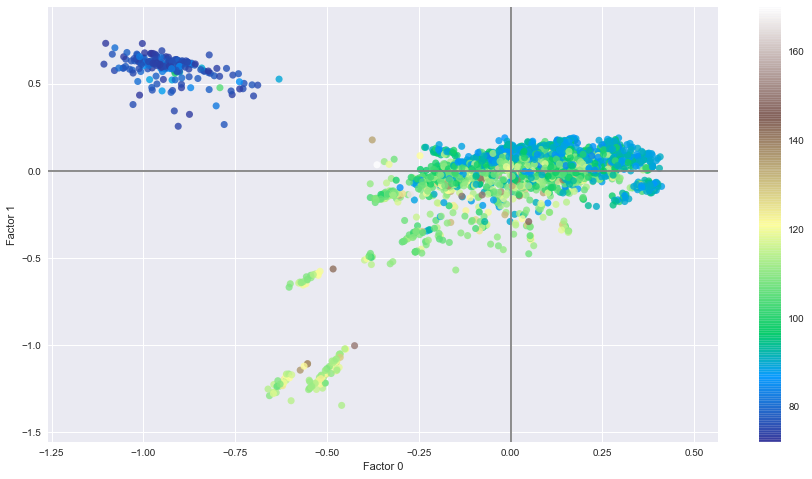

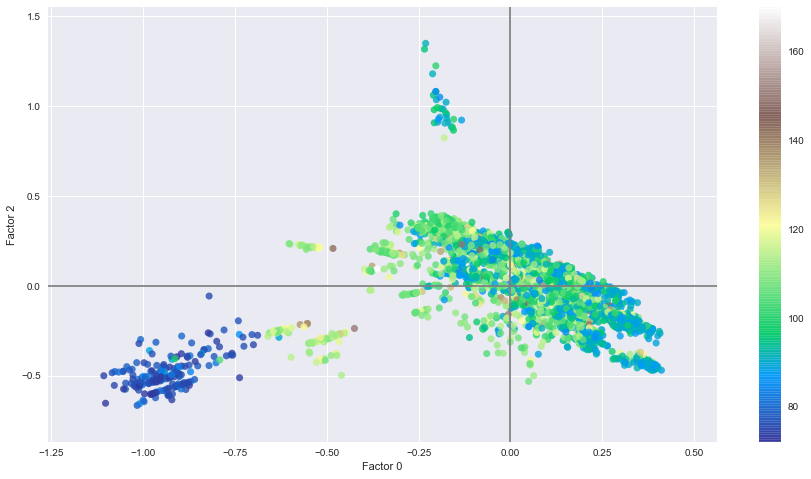

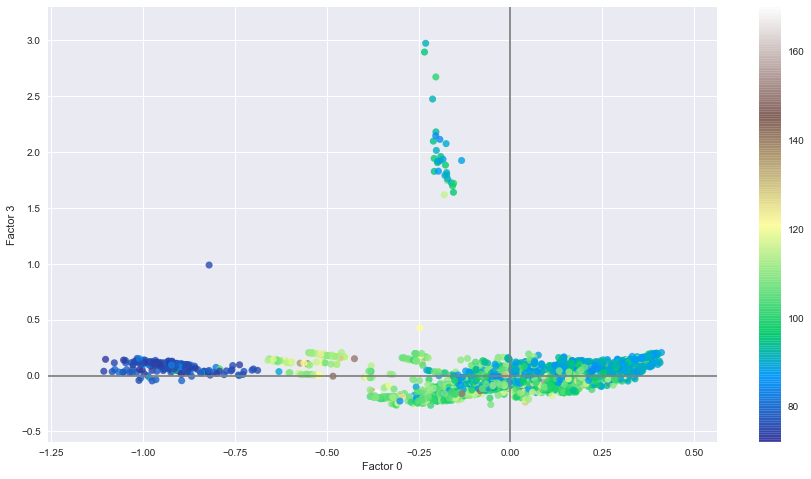

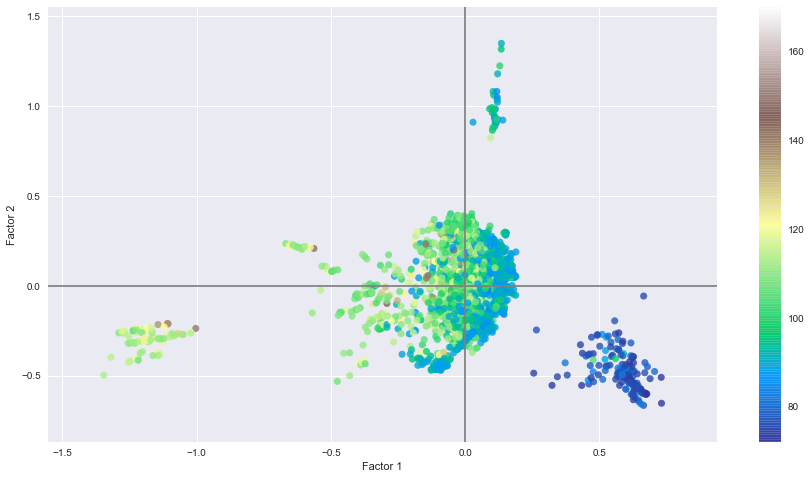

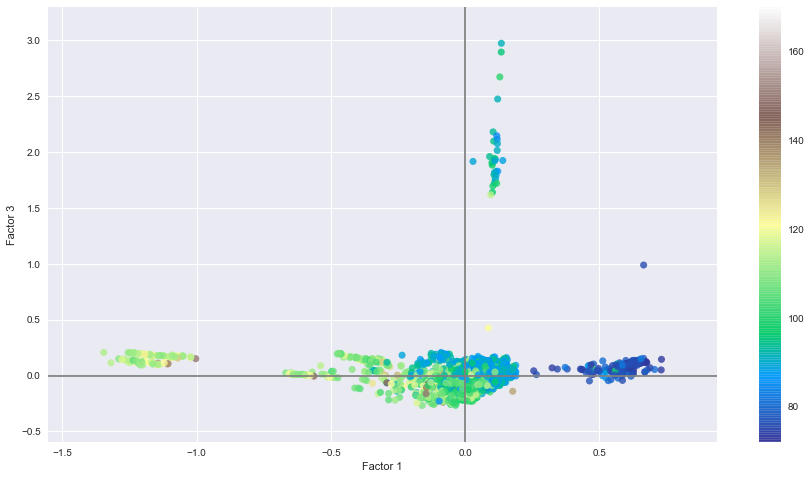

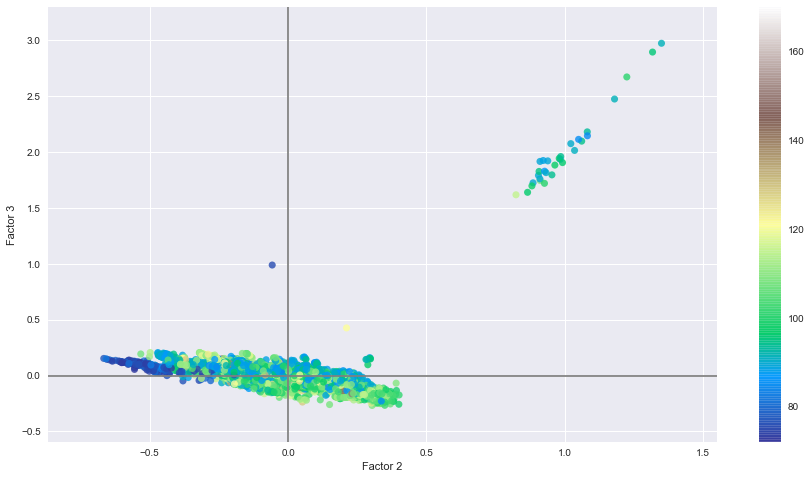

In [17]:
import matplotlib.pyplot as plt

cm = plt.cm.terrain
for i in range(0, 4):
	for j in range(i+1, 4):
		if i != j:
			points = table3.loc[fs].values[(i,j), :]
			labels = table3.columns.values
			plt.figure('MCA %s%s' % (i,j))
			plt.margins(0.1)
			plt.axhline(0, color='gray')
			plt.axvline(0, color='gray')
			plt.xlabel('Factor %s' %i)
			plt.ylabel('Factor %s' %j)
			sc = plt.scatter(*points, s=50, marker='o', c=X_mca.y, alpha=.8, linewidths=0, cmap=cm)
			#for label, x, y in zip(labels, *points):
			    #plt.annotate(label, xy=(x, y), xytext=(x + .03, y + .03))
			plt.colorbar(sc)

In [18]:
from sklearn.cross_decomposition import PLSRegression 

X = train.drop('y', axis=1)
y = train.y

X_train, X_test, y_train, y_test = train_test_split(X[y<200], y[y<200], train_size=0.6)
plsca = PLSRegression(n_components=10)
plsca.fit(X_train, y_train)
X_train_r = plsca.transform(X_train)
X_test_r = plsca.transform(X_test)

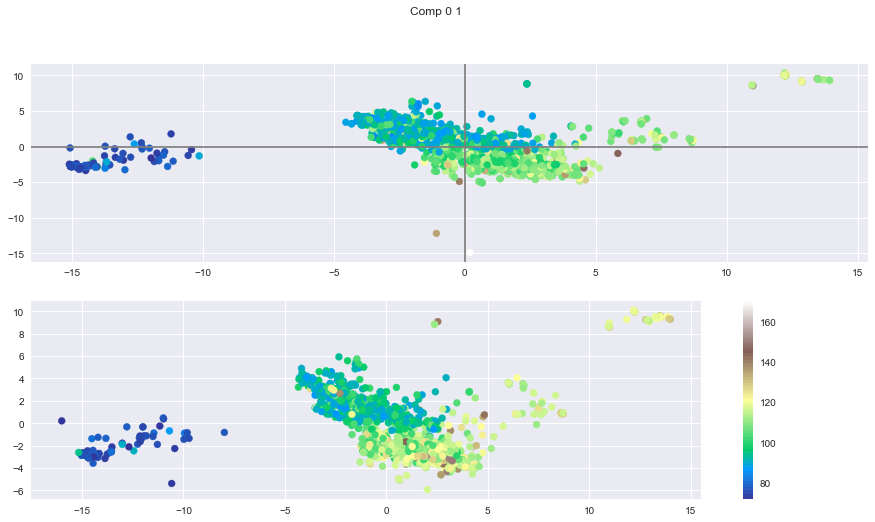

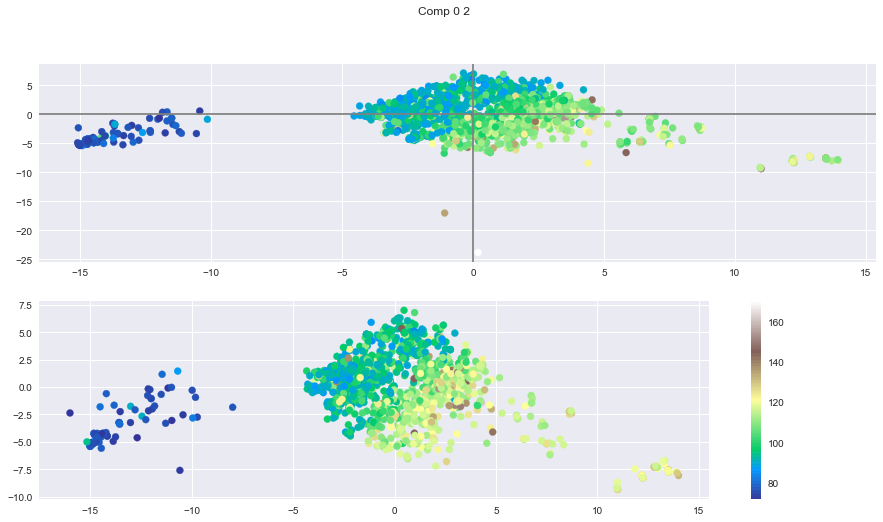

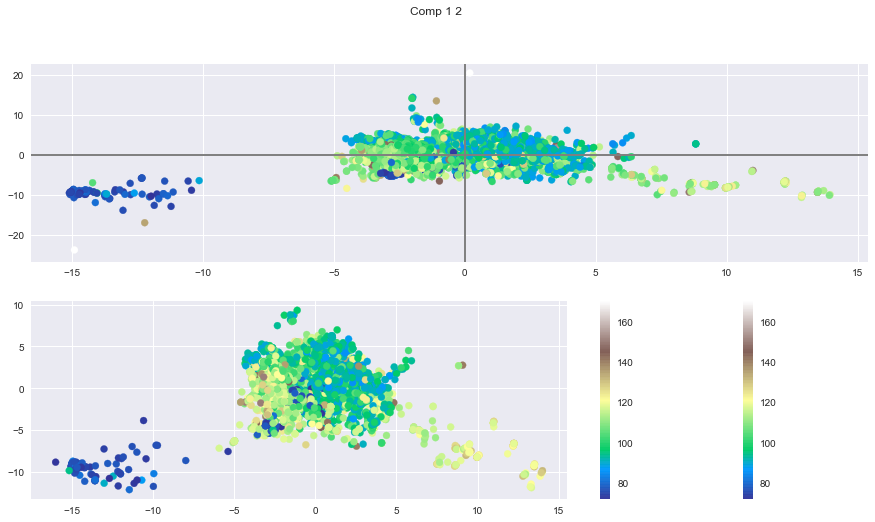

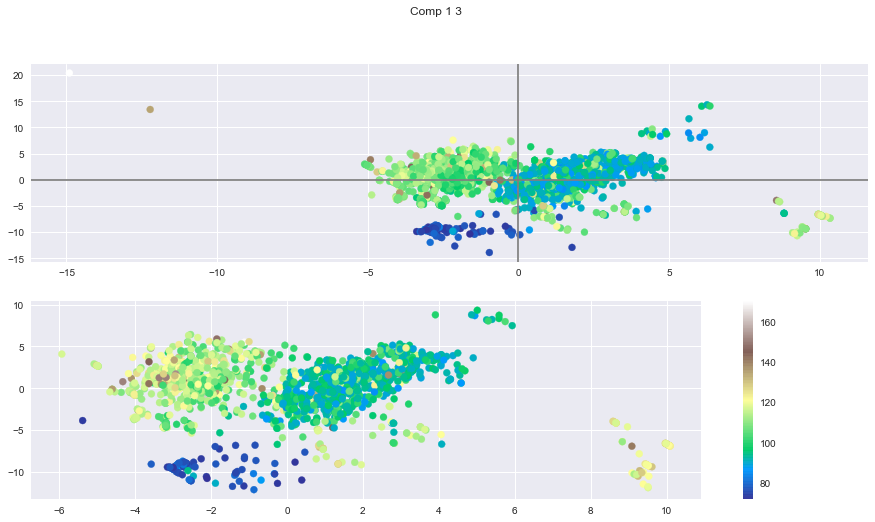

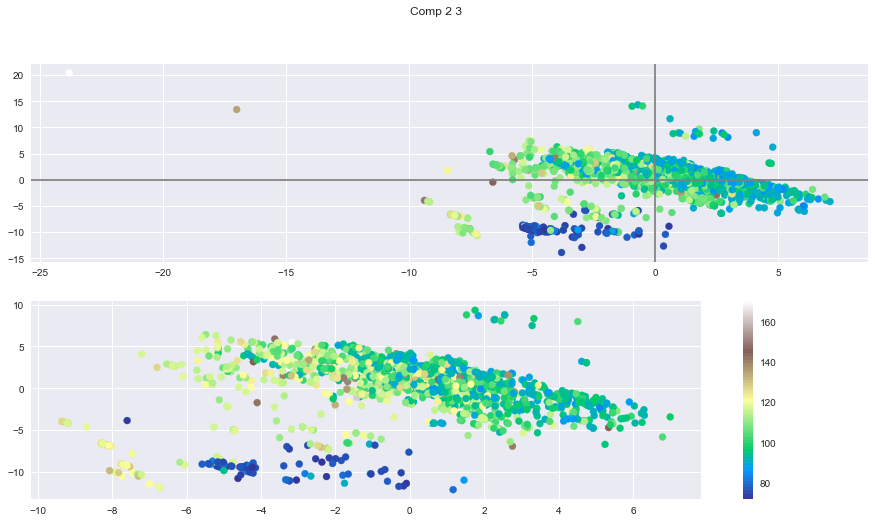

In [22]:
for i in range(4):
    for j in range(i+1, 4):
        plt.figure('%s' % (i+j))
        plt.subplot(211)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.suptitle('Comp %s %s' % (i, j))
        plt.scatter(X_train_r[:, i], X_train_r[:, j], c=y_train, cmap=cm)
        plt.subplot(212)
        plt.scatter(X_test_r[:, i], X_test_r[:, j], c=y_test, cmap=cm)
        plt.colorbar(sc)